In [1]:
from allthethings import PyNetwork, PyPipe_ps
from allthethings import PyBC_opt_dh
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
fii = []   #list of .inp file names
fci = []   #list of .config file names
V0 =[]     #initial volume
Vf = []    #final volume
Hbar = []  #average dh/dx over time (list of arrays)
legs = []  #legend entries
lr = []    #?
mtype = 1                      #model used along network edges. 1 for Preissman Slot. 0 for uniform

In [3]:
Mrs = [0.015]*3  #manning roughness coeffs
Ds = [1.]*3      #pipe diameter (m)
jt = [1,3,1,1]   #junction type
bt = [1,1,1,1]   #boundary type 
bv = [0,0,0,0]   #boundary value
r = [0,0,1,1]    #boundary reflect
h0s = [.8,.8,.8]    #IC for h
q0s = [2.,1.,1.]    #IC for Q
#h0s = [.0,.0,.0]    #IC for h
#q0s = [0.,0.,0.]    #IC for Q

T = 20           #simulation time (s)
M = 3200         #number of time steps
a = 120          #pressure wavespeed
Q00 = 0*np.ones(M+1)   #boundary condition at node 0
#for i in range(M/2, M+1):
#    Q00[i] = 0
Nl = 8           #number of lengths to try
for i in range(0,Nl):
    from writeit import rewritePipes
    Ns = [100,100,25*(i+1)]
    Ls = [100,100,25*(i+1)]
    fn = "indata/varylength%d"%i
    oldinp = "indata/3pipesL0.inp"
    #make new .inp and .config files called fn.inp and fn.config with desired characteristics
    #based on layout in oldinp 
    (fi, fc) = rewritePipes(fn,oldinp, Ns, Ls, Mrs, Ds, jt, bt, bv, r, h0s, q0s, T, M, a)
    fii.append(fi)
    fci.append(fc)

new files are indata/varylength0.inp and indata/varylength0.config
new files are indata/varylength1.inp and indata/varylength1.config
new files are indata/varylength2.inp and indata/varylength2.config
new files are indata/varylength3.inp and indata/varylength3.config
new files are indata/varylength4.inp and indata/varylength4.config
new files are indata/varylength5.inp and indata/varylength5.config
new files are indata/varylength6.inp and indata/varylength6.config
new files are indata/varylength7.inp and indata/varylength7.config


In [4]:
for i in range(0,Nl):
    print fci[i]
    n0 = PyNetwork(fii[i], fci[i], mtype)     #a network object
    T = n0.T
    M = n0.M
    dt = T/M
    n0.setbVal(0,Q00)
    print "T = %.2f M = %d , L = [%.f, %.f, %.f]"%(T,M, n0.Ls[0], n0.Ls[1], n0.Ls[2])
    V0.append(n0.getTotalVolume())
    n0.runForwardProblem(dt)
    Vf.append(n0.getTotalVolume())
    htmp = [n0.getAveGradH(i) for i in range(n0.M+1)]
    Hbar.append(htmp)
    lr.append(n0.Ls[2]/n0.Ls[1])
    legs.append("L1/L2 = %1.2f"%(n0.Ls[2]/n0.Ls[1]))  #legend entry
dx = n0.Ls[0]/n0.Ns[0]
print" \ndt/dx*a = %f" %(dt/dx*n0.a[0])

indata/varylength0.config
T = 20.00 M = 3200 , L = [100, 100, 25]
indata/varylength1.config
T = 20.00 M = 3200 , L = [100, 100, 50]
indata/varylength2.config
T = 20.00 M = 3200 , L = [100, 100, 75]
indata/varylength3.config
T = 20.00 M = 3200 , L = [100, 100, 100]
indata/varylength4.config
T = 20.00 M = 3200 , L = [100, 100, 125]
indata/varylength5.config
T = 20.00 M = 3200 , L = [100, 100, 150]
indata/varylength6.config
T = 20.00 M = 3200 , L = [100, 100, 175]
indata/varylength7.config
T = 20.00 M = 3200 , L = [100, 100, 200]
 
dt/dx*a = 0.750000


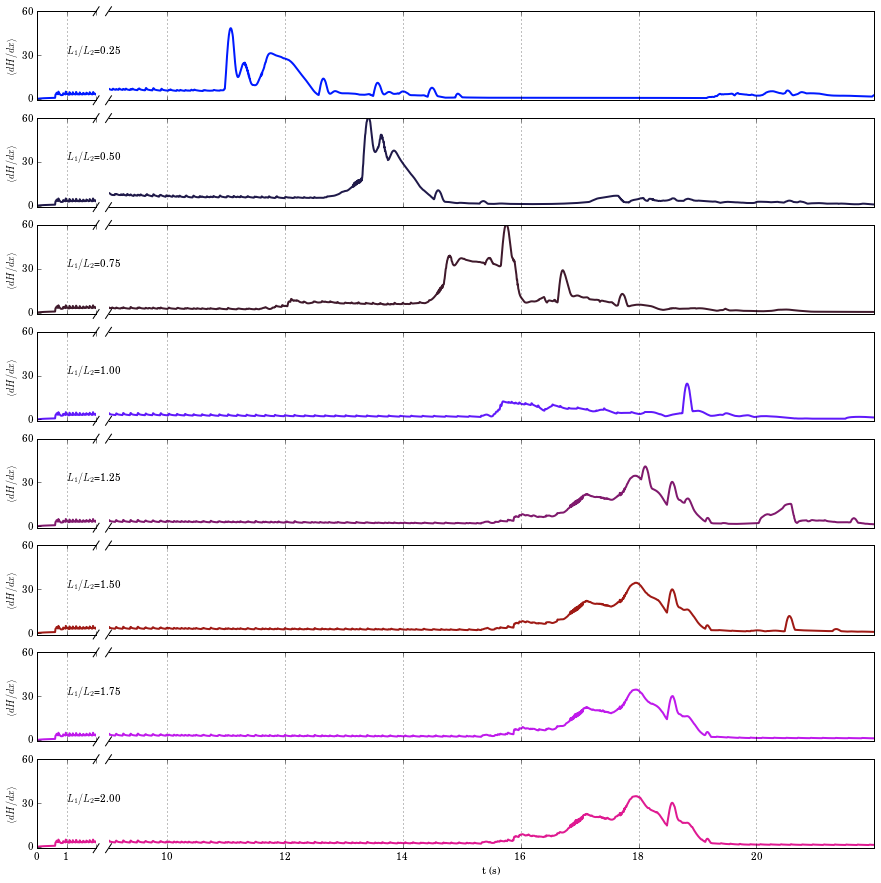

In [5]:

#print" \ndt/dx*a = %f" %(dt/dx*n0.a[0])
import matplotlib.gridspec as gridspec
rc('text', usetex=True)        #for tex rendering. 
rc('font', family='serif')     #for pretty font 
t = linspace(0,T,M+1)
xlim  = [0., 1.0]
xlab = [0,1]
xlim2 = [7, T]
xlab2 = [8,10,12,14,16,18,20]
ylim = [-1,60]
yticks = [0,30,60]
xticks = [0,2]
xlimratio = (xlim[1]-xlim[0])/(xlim2[1]-xlim2[0]+xlim[1]-xlim[0])
xlim2ratio = (xlim2[1]-xlim2[0])/(xlim2[1]-xlim2[0]+xlim[1]-xlim[0])
gs = gridspec.GridSpec(len(Hbar), 2, width_ratios=[xlimratio, xlim2ratio])
fig = plt.figure(figsize=(15,15))
ax = []

for i in range(len(Hbar)):
    ax.append(fig.add_subplot(gs[2*i]))
    ax.append(fig.add_subplot(gs[2*i+1]))
    #erase the bits of bounding box you don't want
    ax[2*i].spines['right'].set_visible(False)
    ax[2*i+1].spines['left'].set_visible(False)

    ax[2*i].yaxis.tick_left()
    ax[2*i+1].set_yticks([])
    ax[2*i].plot(t,Hbar[i],c =(i/8., .1, cos(i)**2),linewidth=2)
    ax[2*i+1].plot(t,Hbar[i],c =(i/8., .1, cos(i)**2),linewidth=2)

    ax[2*i+1].set_xlim(xlim2)
    ax[2*i].set_xlim(xlim)
    ax[2*i].set_ylabel(r'$\langle dH/dx\rangle$')  
    ax[2*i].set_xticklabels([])
    ax[2*i+1].set_xticklabels([])
    
    ax[2*i].set_ylim(ylim)
    ax[2*i+1].set_ylim(ylim)

    ax[2*i].set_yticks(yticks)
    ax[2*i].set_yticklabels(yticks)
    ax[2*i].set_xticks(xticks)

    ax[2*i].set_xticks([0,1,2])
   
    ax[2*i].text(1,ylim[1]/2,r"$L_1/L_2$=%1.2f"%lr[i])  #label the subplots
    
    #diagonal lines for split axes
    d = .05 # how big to make the diagonal lines in axes coordinates
    # arguments to pass plot, just so we don't keep repeating them
    kwargs = dict(transform=ax[2*i].transAxes, color='k', clip_on=False)
    dx = d/(xlim[1]-xlim[0])
    dy = d
    ax[2*i].plot((1-dx,1+dx),(-dy,+dy), **kwargs)    # top-right diagonal
    ax[2*i].plot((1-dx,1+dx),(1-dy,1+dy), **kwargs) # bottom-right diagonal
    dx = d/(xlim2[1]-xlim2[0])
    kwargs.update(transform=ax[2*i+1].transAxes)  # switch to the bottom axes
    ax[2*i+1].plot((-dx,+dx),(-dy,+dy), **kwargs)      # top-left diagonal
    ax[2*i+1].plot((-dx,+dx),(1-dy,1+dy), **kwargs)    # bottom-left diagonal
    plt.subplots_adjust(wspace=0.03)
    #make vertical gridlines
    ax[2*i+1].xaxis.grid(True)
    ax[2*i].xaxis.grid(True)
ax[2*i].set_xticklabels(xlab)
ax[2*i+1].set_xticklabels(xlab2)
ax[2*i+1].set_xlabel('t (s)')
#plt.show()
#uncomment following line to save this figure:
savefig("../dhdxresultsprettynewer2.eps", format='eps')

In [6]:
t = linspace(0,T,M+1);
Nh = len(legs)
print "L1/L2 & mean (dH/dx) &  max(dH/dx) \\\n\hline\\\\"
for i in range(len(Hbar)):
    print "%1.2f    & %.4f    &   %.4f \\\\"%(lr[i], mean(Hbar[i]), max(Hbar[i]))



L1/L2 & mean (dH/dx) &  max(dH/dx) \
\hline\\
0.25    & 5.0609    &   48.3832 \\
0.50    & 5.4465    &   60.9356 \\
0.75    & 6.1335    &   60.6128 \\
1.00    & 3.4518    &   24.4900 \\
1.25    & 5.5090    &   40.9716 \\
1.50    & 5.1254    &   34.4893 \\
1.75    & 5.1019    &   34.5001 \\
2.00    & 5.1504    &   34.6804 \\


In [7]:
qi = [n0.q(i) for i in range(n0.Nedges)]
Qi = [qi[i][n0.Ns[i]:] for i in range(3)] 

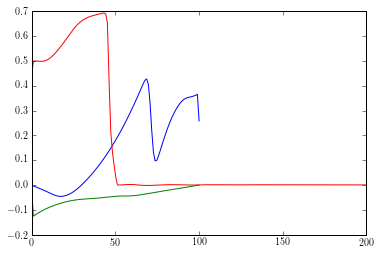

In [8]:
xi = [linspace(0,Ls[i],Ns[i]) for i in range(3)]
for i in range(3):
    plot(xi[i],Qi[i])

In [9]:
print Qi[0][-1]


0.258353145238


In [10]:
print (Qi[1][0]+Qi[2][0])

0.427040917372
